# Introducción 

La base de datos que se utilizará en este reto es la de Telecom X, que contiene información sobre clientes, suscripciones y servicios de telecomunicaciones. El objetivo es realizar un análisis exploratorio de los datos para identificar patrones y tendencias en el comportamiento de los clientes, así como para detectar posibles problemas o áreas de mejora en los servicios ofrecidos. 

Para ello, se utilizarán técnicas de limpieza y transformación de datos, así como herramientas de visualización y análisis estadístico. El análisis se centrará en aspectos como la distribución de los clientes por tipo de suscripción, el uso de servicios, la satisfacción del cliente y la retención de clientes.

El propósito general de este reto es encontrar patrones de personas que han abandono la empresa y que han permanecido en la empresa, para así poder identificar las características de los clientes que abandonan la empresa y las que permanecen.

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

In [86]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json
import plotly.express as px 

In [87]:
datos = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
resultado = json.loads(datos.text)
df = pd.DataFrame(resultado)

In [88]:
customer_df = pd.json_normalize(df['customer'])
phone_df    = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df  = pd.json_normalize(df['account'])

# Ahora concatenamos todo con las columnas originales que ya estaban planas
df = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [90]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

# Preparación de datos

## Eliminar columnas innecesarias


In [91]:
df.drop(columns= 'customerID', inplace=True)

In [92]:
df.columns = df.columns.str.strip()
df.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total'],
      dtype='object')

## Limpiar valores nulos

In [93]:
df.isna().sum()

Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [94]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].replace('', np.nan)

col_yes_no = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'OnlineBackup','OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV',
              'StreamingMovies', 'PaperlessBilling']

for col in col_yes_no:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))


--- Churn ---
Churn
No     5174
Yes    1869
NaN     224
Name: count, dtype: int64

--- Partner ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64

--- Dependents ---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64

--- PhoneService ---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64

--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64

--- OnlineBackup ---
OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64

--- OnlineSecurity ---
OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64

--- DeviceProtection ---
DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64

--- TechSupport ---
TechSupport
No                     3582
Yes                    2104
No

In [95]:
df.shape[0]

7267

In [96]:
df.isna().sum()

Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64

In [97]:
df.dropna(inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [99]:
df['Charges.Total'] = df['Charges.Total'].astype('float64')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Traducciones

In [101]:
# Renombrar columnas al español

columnas_español = {
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Es_mayor_de_edad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Meses_contrato',
    'PhoneService': 'Servicio_telefonico',
    'MultipleLines': 'Lineas_telefonicas_multiples',
    'InternetService': 'Tipo_servicio_internet',
    'OnlineSecurity': 'Seguridad_en_linea',
    'OnlineBackup': 'Respaldo_en_linea',
    'DeviceProtection': 'Proteccion_dispositivo',
    'TechSupport': 'Soporte_tecnico',
    'StreamingTV': 'TV_en_streaming',
    'StreamingMovies': 'Peliculas_en_streaming',
    'Contract': 'Tipo_contrato',
    'PaperlessBilling': 'Factura_en_linea',
    'PaymentMethod': 'Metodo_pago',
    'Charges.Monthly': 'Cargo_mensual',
    'Charges.Total': 'Cargos_totales'
}


df.rename(columns=columnas_español, inplace=True)
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales'],
      dtype='object')

In [102]:
df['Tipo_servicio_internet'].value_counts()

Tipo_servicio_internet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [103]:
col_si_no = ['Abandono','Pareja', 'Dependientes','Servicio_telefonico', 
              'Lineas_telefonicas_multiples', 'Respaldo_en_linea', 
              'Seguridad_en_linea', 'Proteccion_dispositivo', 'Soporte_tecnico', 
              'TV_en_streaming', 'Peliculas_en_streaming', 'Factura_en_linea']
    
for col in df[col_si_no]:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    df[col] = df[col].fillna(0).astype(int)

df['Tipo_servicio_internet'] = df['Tipo_servicio_internet'].map({'Fiber optic': 'Fibra Optica', 'DSL': 'DSL', 'No': 'Sin servicio'})
df['Tipo_contrato'] = df['Tipo_contrato'].map({'Month-to-month':'Mes a mes','Two year':'Dos años','One year':'Un año'})
df['Metodo_pago'] = df['Metodo_pago'].map({'Electronic check':'Cheque electrónico', 'Mailed check':'Cheque por enviado por correo', 'Bank transfer (automatic)':'Transferencia bancaria (automática)', 'Credit card (automatic)':'Tarjeta de crédito (automática)'})


In [104]:
df.head()

,Abandono,Genero,Es_mayor_de_edad,Pareja,Dependientes,Meses_contrato,Servicio_telefonico,Lineas_telefonicas_multiples,Tipo_servicio_internet,Seguridad_en_linea,Respaldo_en_linea,Proteccion_dispositivo,Soporte_tecnico,TV_en_streaming,Peliculas_en_streaming,Tipo_contrato,Factura_en_linea,Metodo_pago,Cargo_mensual,Cargos_totales
0,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,Un año,1,Cheque por enviado por correo,65.6,593.30
1,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Mes a mes,0,Cheque por enviado por correo,59.9,542.40
2,1,Male,0,0,0,4,1,0,Fibra Optica,0,0,1,0,0,0,Mes a mes,1,Cheque electrónico,73.9,280.85
3,1,Male,1,1,0,13,1,0,Fibra Optica,0,1,1,0,1,1,Mes a mes,1,Cheque electrónico,98.0,1237.85
4,1,Female,1,1,0,3,1,0,Fibra Optica,0,0,0,1,1,0,Mes a mes,1,Cheque por enviado por correo,83.9,267.40


In [105]:
df['Cargos_diarios'] = df['Cargo_mensual']/30

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Abandono                      7032 non-null   int64  
 1   Genero                        7032 non-null   object 
 2   Es_mayor_de_edad              7032 non-null   int64  
 3   Pareja                        7032 non-null   int64  
 4   Dependientes                  7032 non-null   int64  
 5   Meses_contrato                7032 non-null   int64  
 6   Servicio_telefonico           7032 non-null   int64  
 7   Lineas_telefonicas_multiples  7032 non-null   int64  
 8   Tipo_servicio_internet        7032 non-null   object 
 9   Seguridad_en_linea            7032 non-null   int64  
 10  Respaldo_en_linea             7032 non-null   int64  
 11  Proteccion_dispositivo        7032 non-null   int64  
 12  Soporte_tecnico               7032 non-null   int64  
 13  TV_en_st

## Codificaciones de variables explicativas

### Variables Numericas

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
X = df.drop(columns='Abandono')
y = df['Abandono']

In [109]:
def ancho_bin(df,columna):
    q75,q25 = np.percentile(df[columna],[75,25])
    iqr = q75-q25
    ancho = 2*iqr*np.power(len(df[columna]),-1/3)
    return ancho

In [110]:
df.columns

Index(['Abandono', 'Genero', 'Es_mayor_de_edad', 'Pareja', 'Dependientes',
       'Meses_contrato', 'Servicio_telefonico', 'Lineas_telefonicas_multiples',
       'Tipo_servicio_internet', 'Seguridad_en_linea', 'Respaldo_en_linea',
       'Proteccion_dispositivo', 'Soporte_tecnico', 'TV_en_streaming',
       'Peliculas_en_streaming', 'Tipo_contrato', 'Factura_en_linea',
       'Metodo_pago', 'Cargo_mensual', 'Cargos_totales', 'Cargos_diarios'],
      dtype='object')

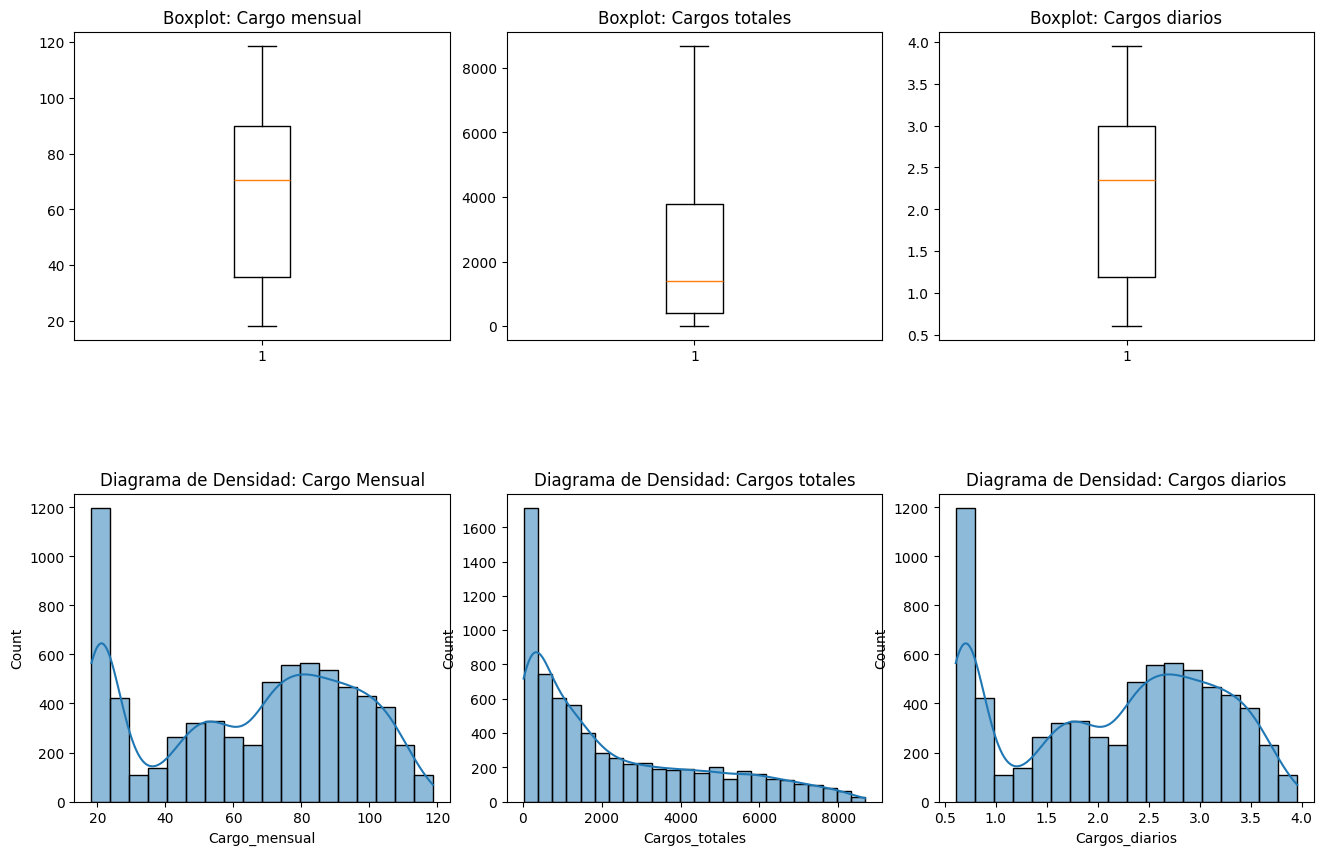

In [111]:
fig, ax = plt.subplots(2,3, figsize = (16,10))
fig.subplots_adjust(hspace= 0.5, wspace= 0.15)
ax[0,0].boxplot(x = df['Cargo_mensual'])
ax[0,0].set_title('Boxplot: Cargo mensual')

ax[0,1].boxplot(x = df['Cargos_totales'])
ax[0,1].set_title('Boxplot: Cargos totales')

ax[0,2].boxplot(x = df['Cargos_diarios'])
ax[0,2].set_title('Boxplot: Cargos diarios')



sns.histplot(data=df, x='Cargo_mensual', kde=True, binwidth=ancho_bin(df, 'Cargo_mensual'), ax=ax[1, 0])
ax[1,0].set_title('Diagrama de Densidad: Cargo Mensual')

sns.histplot(data= df, x = 'Cargos_totales',kde= True, binwidth= ancho_bin(df,'Cargos_totales'), ax = ax[1,1])
ax[1,1].set_title('Diagrama de Densidad: Cargos totales')

sns.histplot(data= df, x = 'Cargos_diarios',kde= True, binwidth= ancho_bin(df,'Cargos_diarios'), ax = ax[1,2])
ax[1,2].set_title('Diagrama de Densidad: Cargos diarios')


plt.show()

In [112]:
normalizador = MinMaxScaler()
columnas_a_normalizar = ['Cargo_mensual', 'Cargos_totales', 'Cargos_diarios']
X[columnas_a_normalizar] = normalizador.fit_transform(X[columnas_a_normalizar])


### Variables categóricas

In [113]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [114]:
columnas_cat = list(X.select_dtypes(include='object').columns)

one_hot = make_column_transformer((OneHotEncoder(drop= 'if_binary', dtype= np.int64), columnas_cat),
                                  remainder= 'passthrough', sparse_threshold=0)


X = one_hot.fit_transform(X)
X_codificada = pd.DataFrame(X,columns=one_hot.get_feature_names_out())

In [115]:
X_codificada

,onehotencoder__Genero_Male,onehotencoder__Tipo_servicio_internet_DSL,onehotencoder__Tipo_servicio_internet_Fibra Optica,onehotencoder__Tipo_servicio_internet_Sin servicio,onehotencoder__Tipo_contrato_Dos años,onehotencoder__Tipo_contrato_Mes a mes,onehotencoder__Tipo_contrato_Un año,onehotencoder__Metodo_pago_Cheque electrónico,onehotencoder__Metodo_pago_Cheque por enviado por correo,onehotencoder__Metodo_pago_Tarjeta de crédito (automática),...,remainder__Seguridad_en_linea,remainder__Respaldo_en_linea,remainder__Proteccion_dispositivo,remainder__Soporte_tecnico,remainder__TV_en_streaming,remainder__Peliculas_en_streaming,remainder__Factura_en_linea,remainder__Cargo_mensual,remainder__Cargos_totales,remainder__Cargos_diarios
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.471144,0.066294,0.471144
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.414428,0.060420,0.414428
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.553731,0.030239,0.553731
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.793532,0.140670,0.793532
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.653234,0.028687,0.653234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.367164,0.083556,0.367164
7028,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.665174,0.214043,0.665174
7029,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.318905,0.008533,0.318905
7030,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.493532,0.531831,0.493532


## Normalizacion de variable respuesta

In [116]:
y.value_counts()

Abandono
0    5163
1    1869
Name: count, dtype: int64

In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
X_codificada.shape[0]

7032

In [119]:
oversampling = SMOTE()
X_balanceada, y_balanceada = oversampling.fit_resample(X_codificada,y)

In [120]:
print(X_balanceada.shape[0])
print(y_balanceada.value_counts())

10326
Abandono
0    5163
1    5163
Name: count, dtype: int64


# Correlación y selección de variables

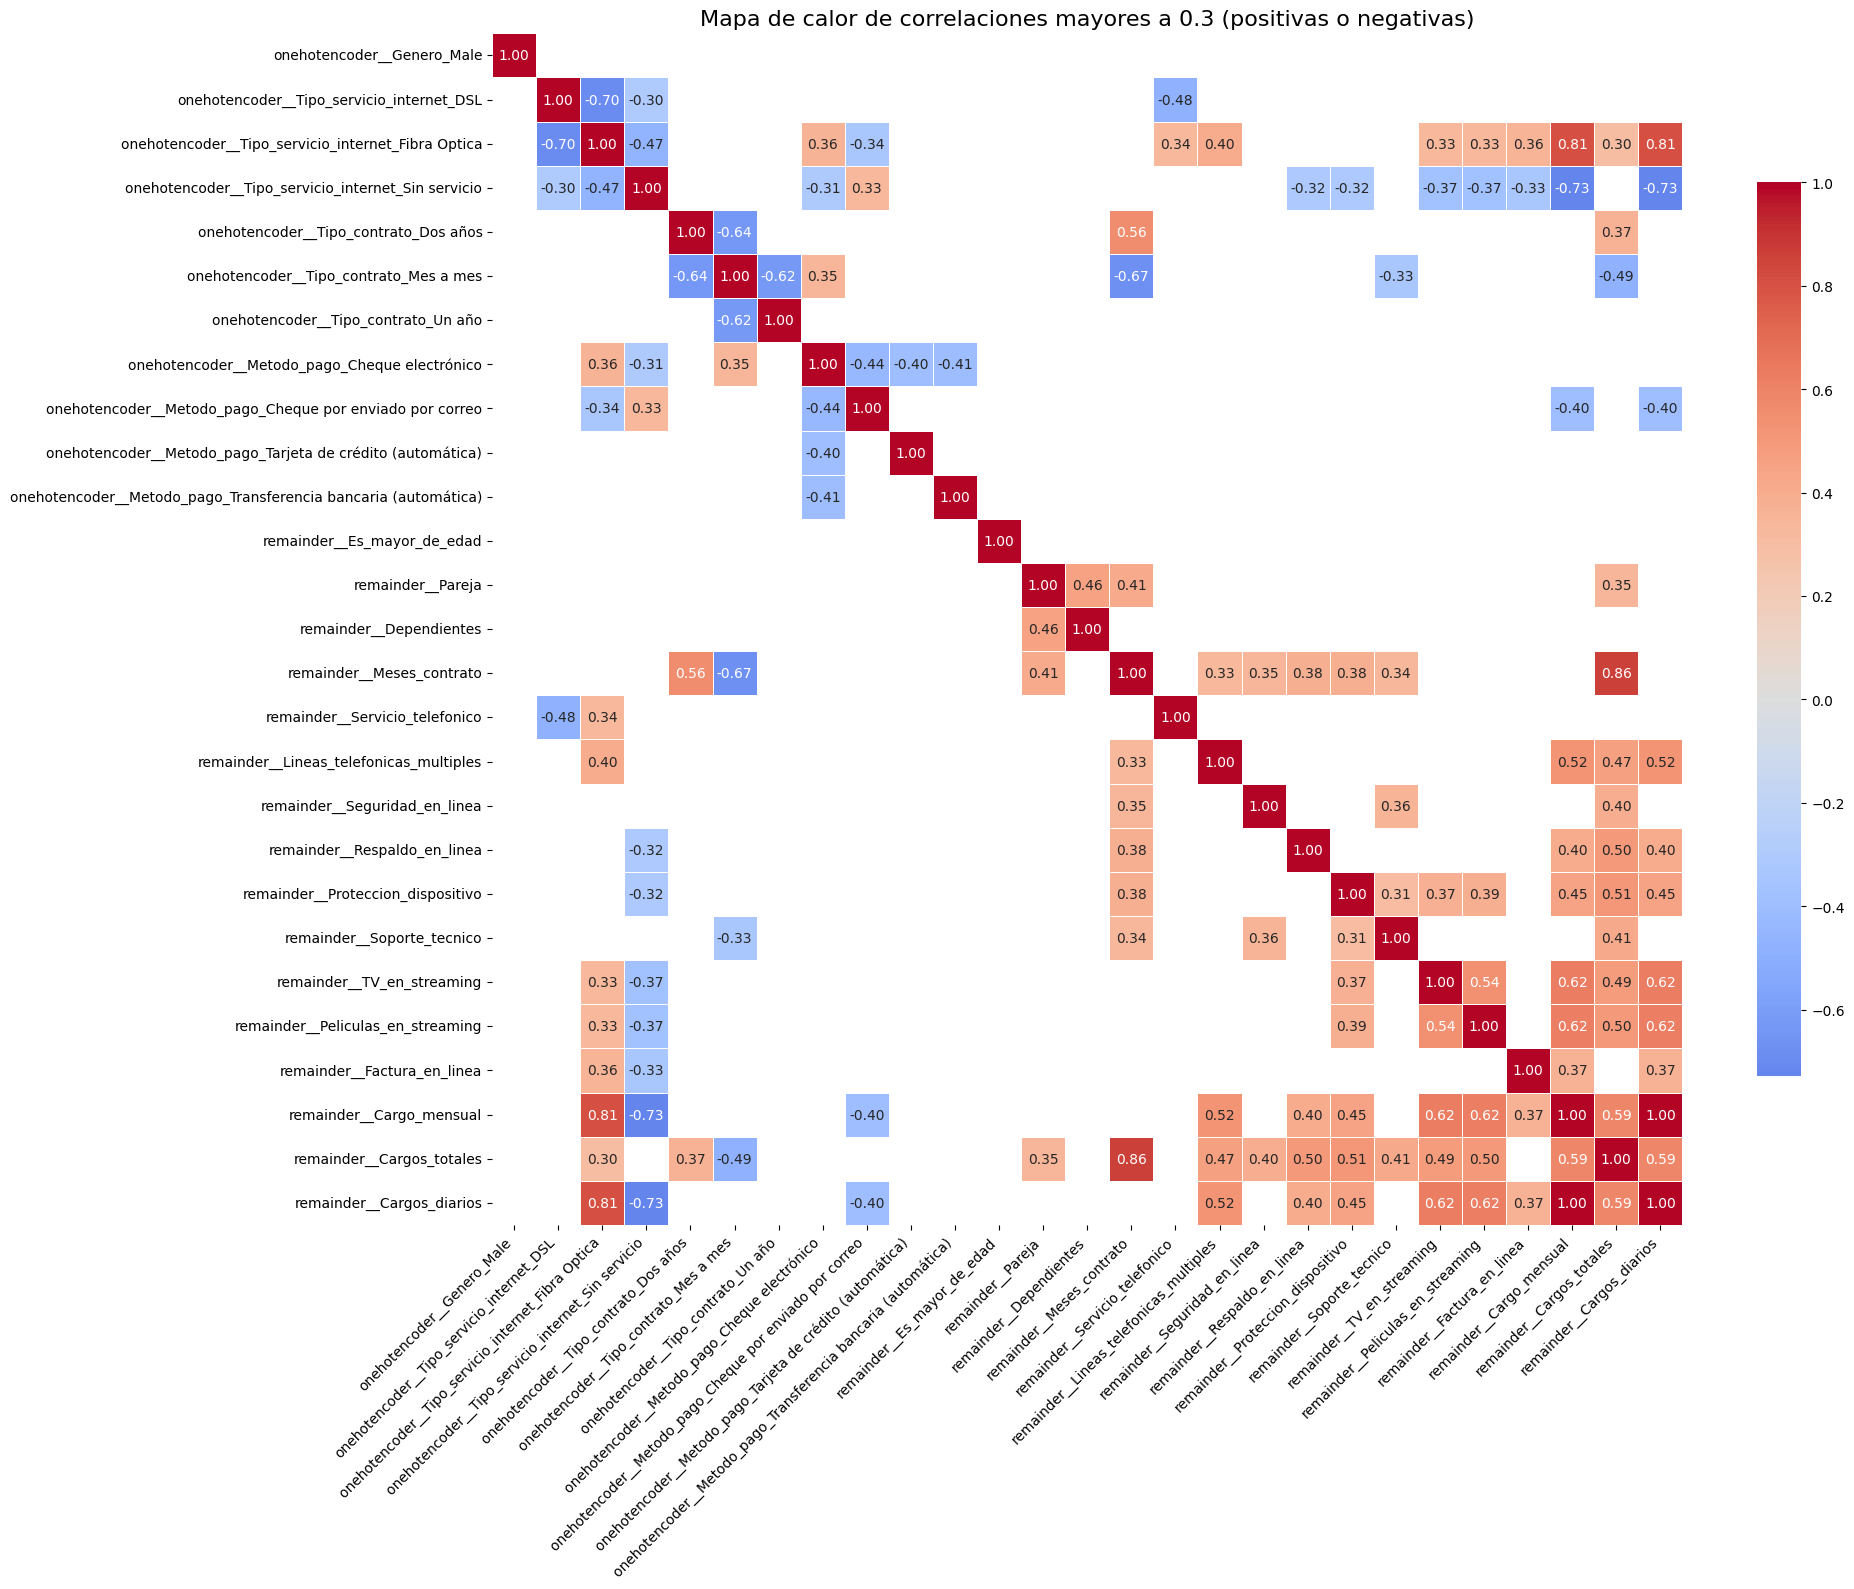

In [121]:
correlation_matrix = X_balanceada.corr()

mask = np.abs(correlation_matrix) < 0.3
correlation_filtered = correlation_matrix.mask(mask)

# Gráfico de calor con números visibles
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_filtered,
            cmap='coolwarm',
            annot=True,             # Mostrar valores
            fmt=".2f",              # Dos decimales
            center=0, 
            linewidths=0.5,         # Separadores entre celdas
            cbar_kws={"shrink": 0.75})  # Barra de color más compacta

plt.title('Mapa de calor de correlaciones mayores a 0.3 (positivas o negativas)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Eliminar variables por multicolinealidad

Algunas variables como `Genero_Male` y `Internet Fibra Optica`, `Meses_contrato` tienen una alta correlación con la variable `Cargo_mensual`, por lo que se necesita revisar si es necesario eliminarlas. La que si se eliminará es `Cargos_diarios` ya que es una variable con una correlación de 1 con `Cargo_mensual`, lo que indica que es redundante.

In [122]:
X_codificada.drop(columns='remainder__Cargos_diarios', inplace = True)

In [123]:
df_num = pd.concat([X_codificada[['remainder__Meses_contrato',
                                  'remainder__Cargo_mensual', 
                                  'remainder__Cargos_totales']], y], axis=1)


corr = df_num.corr()

corr['Abandono']

remainder__Meses_contrato    0.004673
remainder__Cargo_mensual    -0.019108
remainder__Cargos_totales   -0.006625
Abandono                     1.000000
Name: Abandono, dtype: float64

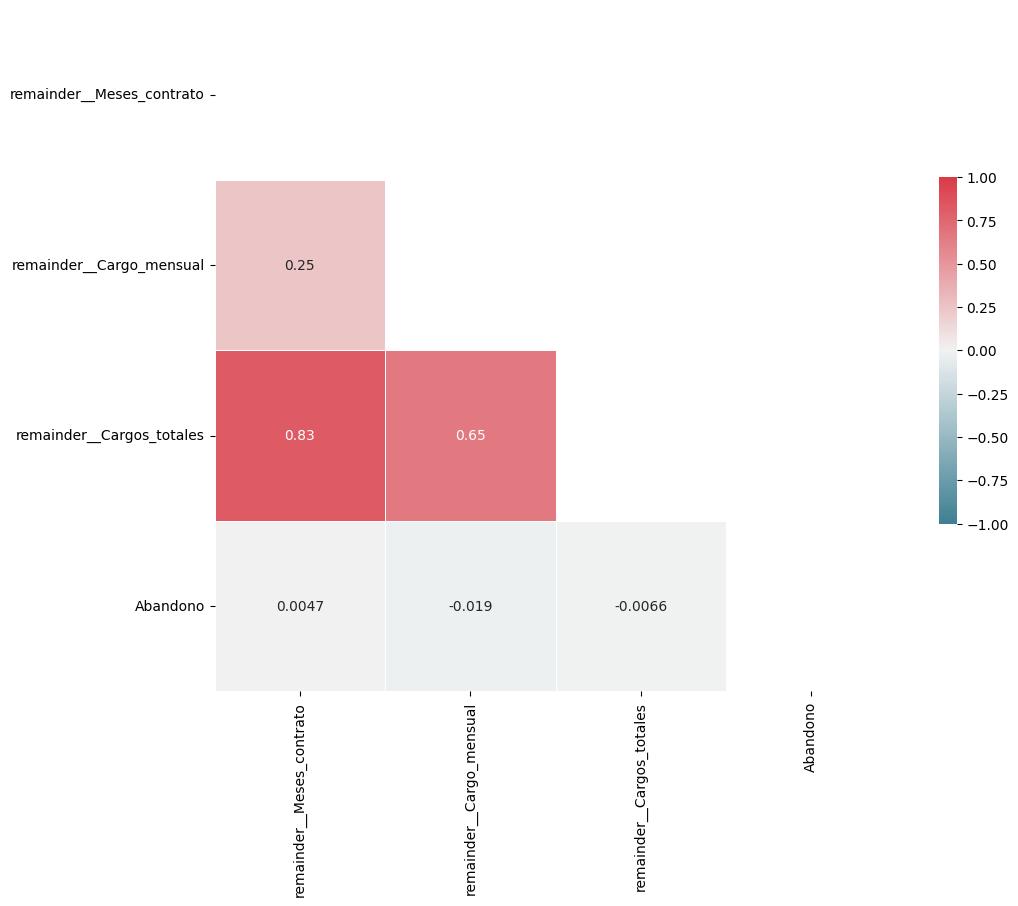

In [124]:
df_num = pd.concat([X_codificada[['remainder__Meses_contrato',
                                  'remainder__Cargo_mensual', 
                                  'remainder__Cargos_totales']], y], axis=1)


corr = df_num.corr()

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})




# Mostrar el mapa de calor (heatmap)
plt.show()

In [125]:
df_contrato_abandono = pd.concat([X_codificada['remainder__Meses_contrato'], y], axis=1)

px.box(data_frame= df_contrato_abandono, x = 'remainder__Meses_contrato', color= 'Abandono')

### No hay relacion debido a que las distribuciones son muy similares

In [126]:
df_cargo_mesual_abandono = pd.concat([X_codificada['remainder__Cargo_mensual'], y], axis=1)

px.box(data_frame= df_cargo_mesual_abandono, x = 'remainder__Cargo_mensual', color= 'Abandono')

In [127]:
df_cargo_total_abandono = pd.concat([X_codificada['remainder__Cargos_totales'], y], axis=1)


px.box(data_frame= df_cargo_total_abandono, x = 'remainder__Cargos_totales', color= 'Abandono')

No hay una correlación significativa entre las variables `Cargo_mensual`,`Cargos_totales` y `Meses_contrato`, con la variable `Churn`, lo que indica que no hay una relación directa entre el monto de los cargos y la decisión de abandonar la empresa. Esto sugiere que otros factores, como la calidad del servicio o la atención al cliente, pueden ser más relevantes para la retención de clientes. Por lo tanto estas variables se eliminarán del análisis.

In [128]:
X_codificada.drop(columns = ['remainder__Meses_contrato', 'remainder__Cargo_mensual', 'remainder__Cargos_totales'], inplace= True)

In [129]:
print(f'Las variables eligadas para el análisis fueron: \n{X_codificada.columns}')

Las variables eligadas para el análisis fueron: 
Index(['onehotencoder__Genero_Male',
       'onehotencoder__Tipo_servicio_internet_DSL',
       'onehotencoder__Tipo_servicio_internet_Fibra Optica',
       'onehotencoder__Tipo_servicio_internet_Sin servicio',
       'onehotencoder__Tipo_contrato_Dos años',
       'onehotencoder__Tipo_contrato_Mes a mes',
       'onehotencoder__Tipo_contrato_Un año',
       'onehotencoder__Metodo_pago_Cheque electrónico',
       'onehotencoder__Metodo_pago_Cheque por enviado por correo',
       'onehotencoder__Metodo_pago_Tarjeta de crédito (automática)',
       'onehotencoder__Metodo_pago_Transferencia bancaria (automática)',
       'remainder__Es_mayor_de_edad', 'remainder__Pareja',
       'remainder__Dependientes', 'remainder__Servicio_telefonico',
       'remainder__Lineas_telefonicas_multiples',
       'remainder__Seguridad_en_linea', 'remainder__Respaldo_en_linea',
       'remainder__Proteccion_dispositivo', 'remainder__Soporte_tecnico',
       'r

# Modelado predictivo

### Separación de variables explicativas y variable respuesta

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X = X_balanceada
y = y_balanceada

# 70% entrenamiento, 15% test y 15% validación
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, stratify=y, random_state=5)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=5)

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [133]:
def evaluacion_modelos(y_test,y_pred):
    print(f'Exactitud: {accuracy_score(y_test, y_pred)}')
    print(f'Precisión: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test,y_pred)}')
    print(f'F1 Score: {f1_score(y_test,y_pred)}')
    matriz_confusion_modelo = confusion_matrix(y_test,y_pred)
    visualizacion_matriz_confusion = ConfusionMatrixDisplay(matriz_confusion_modelo, display_labels=['No Abandono', 'Abadono'])
    visualizacion_matriz_confusion.plot();



Exactitud: 0.500322788896062
Precisión: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\erik-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



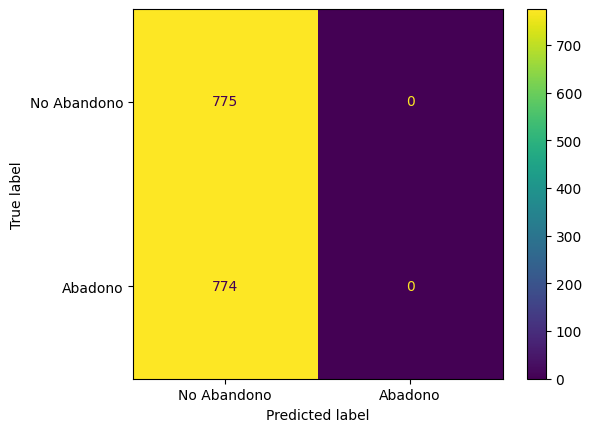

In [134]:
modelo_dummy = DummyClassifier()

modelo_dummy.fit(X_train,y_train)
y_pred_dummy = modelo_dummy.predict(X_val)

resultados_dummy = evaluacion_modelos(y_val,y_pred_dummy)

Exactitud: 0.7921239509360878
Precisión: 0.7950391644908616
Recall: 0.7868217054263565
F1 Score: 0.7909090909090909


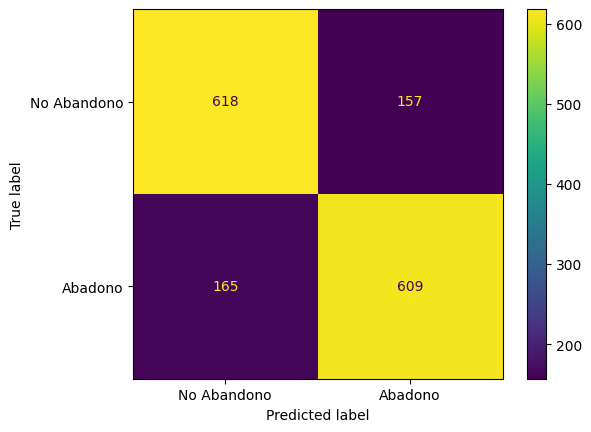

In [135]:
modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_train,y_train)
y_pred_arbol = modelo_arbol.predict(X_val)

resultados_arbol = evaluacion_modelos(y_val,y_pred_arbol)


Exactitud: 0.8502259522272434
Precisión: 0.8510362694300518
Recall: 0.8488372093023255
F1 Score: 0.8499353169469599


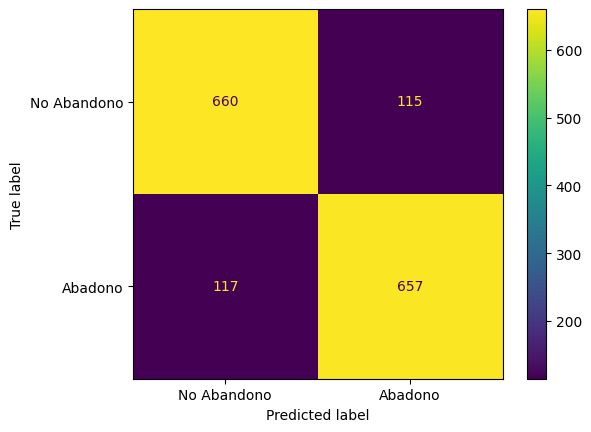

In [137]:
modelo_random = RandomForestClassifier()
modelo_random.fit(X_train,y_train)
y_pred_random = modelo_random.predict(X_val)

resultados_random = evaluacion_modelos(y_val,y_pred_random)


Exactitud: 0.8018076178179471
Precisión: 0.7394871794871795
Recall: 0.9315245478036176
F1 Score: 0.8244711263579189


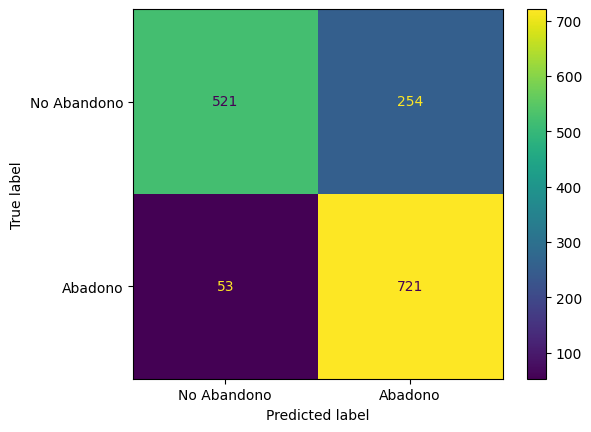

In [138]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train,y_train)
y_pred_knn = modelo_knn.predict(X_val)

resultados_knn = evaluacion_modelos(y_val,y_pred_knn)

Exactitud: 0.7650096836668818
Precisión: 0.7530864197530864
Recall: 0.7881136950904393
F1 Score: 0.7702020202020202


c:\Users\erik-\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



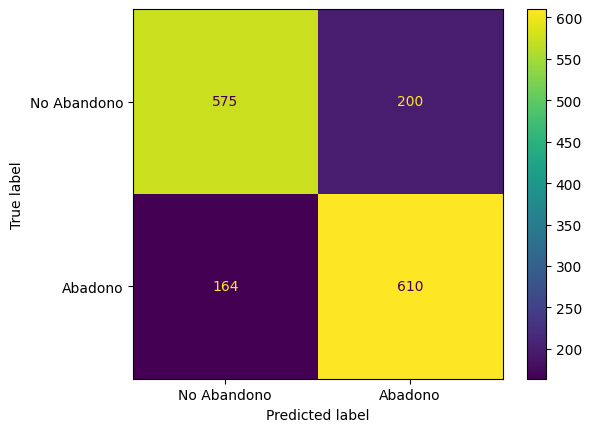

In [139]:
modelo_logistic = LogisticRegression()
modelo_logistic.fit(X_train,y_train)
y_pred_logistic = modelo_logistic.predict(X_val)

resultados_logistic = evaluacion_modelos(y_val,y_pred_logistic)